#### Contents
- [1 -Encontrando a Equação de $M_{total}(n,ν)$ pelo método simbólico ](#Section-1)<br>
- [2 - Momento de atrito em função de ν e de n (Parte dinâmica)](#Section-2)<br>
- [3 - Linearização de $M_{total} para obter $C_d$ e $C_e$](#Section-3)<br>
- [4 - Momento de atrito de vedação (Parte estática)](#Section-4)<br>
- [5 - Momento de vedação $M_{arrasto}$ (Parte estática)](#Section-5)<br>

#### Encontrando a Equação de $M_{total}(n,ν)$ pelo método simbólico:
###### Section-1

In [2]:
import numpy as np
from numpy import linalg 
from sympy import *
import sympy as sp
from scipy.optimize import curve_fit
from scipy import optimize
import matplotlib.pyplot as plt
n = Symbol('n') # para obter a equação simbolica em função de n e  ν descomente
ν = Symbol('ν')
#ν=2
d = 12 # Diâmetro do anel interno
D = 32 # Diâmetro do anel externo
g = 9.81
m = 2.587 #kg massa da carga medido no solid edge (O certo)
krs = 6*10**(-8) # lubrificação a óleo e ar-óleo pag 4
kz = 3.1 # Tabela 4, página 14
R1=3.9*10**-7 # Tabela 2 pag 8
μehl = 0.04 # pág 5  Para óleos sintéticos usar 0.04
S1= 3.23*10**-3 # Rolamento 6003 da série "60" # Tabela 2 pag 8
μbl = 0.12 # para n ≠ 0 = 0.15 para n = 0 (cálculo do torque inicial)
ks1 = 0.0018 # tabela 3 depende do tipo de vedação e tamanho do rolamento
ks2 = 0 # tabela 3 diâmetro da superfície de apoio da vedação [mm]
ds = 18.5  # d2 tabela 3 rolamento 6201 RS
β = 2.25

dm = 0.5*(d+D) # Diâmetro médio
Fr = g*m/2
ϕ_ish=1/(1 + 1.84*10**-9*(n*dm)**1.28*ν**0.64)
ϕ_rs = 1/(np.e**(krs*ν*n*(d+D)*np.sqrt(kz/(2*(D-d)))))
Grr = R1*dm**1.96*Fr**0.54 # variável (tabela 1, página 6), dependendo do:
Mrr=ϕ_ish*ϕ_rs*Grr*(ν*n)**0.6
ϕbl = 1/(np.e**((2.6*10**-8)*(n*ν)**1.4*dm))
μsl = ϕbl*μbl+(1-ϕbl)*μehl # coeficiente de atrito deslizante
Gsl = S1*dm**(-0.26)*Fr**(5/3)
Msl = Gsl*μsl

M_vedacao=0.5*(ks1*ds**β+ks2) # 0.5 porque a vedação é fixada apenas em d2
M_vedacao

Mtotal = Mrr+Msl + M_vedacao
[(Mtotal)]

[0.642813509279449 + 0.00798585976798283/2.71828182845905**(5.72e-7*(n*ν)**1.4) + 0.00065776112051731*(n*ν)**0.6/(2.71828182845905**(7.34944895893563e-7*n*ν)*(9.61875481245844e-8*n**1.28*ν**0.64 + 1))]

#### Momento de atrito em função de ν e de n (Parte dinâmica)
###### Section-2

Copie e cole a equação de $M_{total}$ obtida anteriormente na celula seguinte:

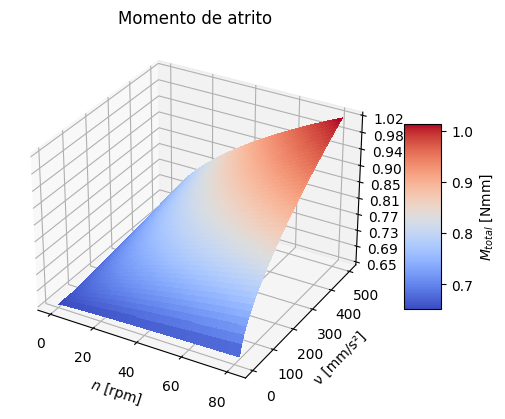

In [3]:
len=50
n = np.linspace(0,82,len)
ν = np.linspace(2,500,len) # Mistura de Óleo 10W30 a 40 °C 69.9mm²/s e Ar
from matplotlib import cm
from matplotlib.ticker import LinearLocator
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
n, ν = np.meshgrid(n, ν)
Mtotal=0.642813509279449 + 0.00798585976798283/2.71828182845905**(5.72e-7*(n*ν)**1.4) + 0.00065776112051731*(n*ν)**0.6/(2.71828182845905**(7.34944895893563e-7*n*ν)*(9.61875481245844e-8*n**1.28*ν**0.64 + 1))
surf = ax.plot_surface(n, ν, Mtotal, cmap=cm.coolwarm,linewidth=0, antialiased=False)               
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf,label='$M_{total}$ [Nmm]', shrink=0.5, aspect=5)
plt.title("Momento de atrito")
plt.xlabel('$n$ [rpm]')
plt.ylabel('ν [mm/s²]')
plt.show()

#### Linearização de $M_{total}$ para obter os coeficientes dinâmico e estático
###### Section-3

Atualize a equação de $M{total}$

Parâmetros da interpolação livre a = 0.0012466593136137957 b = 0.6728151969167667


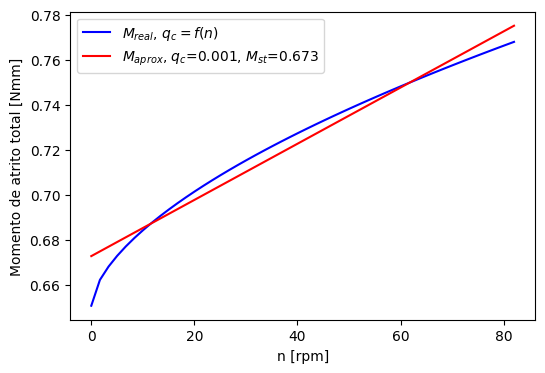

In [4]:
ν=70 # adotando uma viscosidade constante para obter uma curva de velocidades
n = np.linspace(0,82,len)

# Logarítmica
#def func(x, a, b):
#    return a *np.log(x) + b
# Exponencial
#def func(x, a, b, c):
#    return a * np.exp(-b * x) + c
# linear
def func(x, a, b):
    return a*x + b

xdata = n
ydata= 0.642813509279449 + 0.00798585976798283/2.71828182845905**(5.72e-7*(n*ν)**1.4) + 0.00065776112051731*(n*ν)**0.6/(2.71828182845905**(7.34944895893563e-7*n*ν)*(9.61875481245844e-8*n**1.28*ν**0.64 + 1))
fig = plt.subplots(figsize=(6,4))
plt.plot(xdata, ydata,color='blue',lw=1.5, label='$M_{real}$, $q_c=f(n)$')
popt, pcov = curve_fit(func, xdata, ydata)# popt=parâmetros, pcov= covariância
print("Parâmetros da interpolação livre","a =",popt[0],"b =",popt[1])
plt.plot(xdata, func(xdata, *popt),color='red',lw=1.5,label='$M_{aprox}$, $q_c$=%5.3f, $M_{st}$=%5.3f' % tuple(popt))
#popt, pcov = curve_fit(func, xdata, ydata, bounds=([0.00,0.00],[1, 1]))
# bounds=([0,0], [1, 5])) significa que 0<=a<=1 e 0<=b<=5 
#print("Parâmetros da interpolação forçada à otimização","a =",popt[0],"b =",popt[1])
#plt.plot(xdata, func(xdata, *popt), 'g--',label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
#fig = plt.subplots(figsize=(6,4))
#plt.plot(X,Y[:, 4],color='r',lw=1.5,label="velocidade eixo entrada")
#plt.plot(X,Y[:, 7],color='c',lw=1.5,label="velocidade eixo saida")
plt.xlabel('n [rpm]')
plt.ylabel('Momento de atrito total [Nmm]')
plt.legend()
plt.show()

In [5]:
n_rolamentos=6
qc=n_rolamentos*0.104719755120*popt[0]
M_st =n_rolamentos*popt[1]

qc,M_st

(0.0007832991482382238, 4.0368911815006)

Como são 6 rolamentos, será multiplicado por 6 o valor dos parâmetros encontrados

##### Coeficiente dinâmico de Momento de atrito:
Para o cálculo do coeficiente dinâmico foi utilizado o valor do momento de atrito dividido pela rotação, além do fator de conversão de rpm para rad/s que é a constante 0.104719755120.
$$C_{dinâmico} = 0.0015534 [Nmm.s/rad]$$

##### Coeficiente estático de Momento de atrito:
$$C_{estático} = 0.2913 [Nmm]$$

#### Momento de vedação $M_{vedacao}$ (Parte estática)
###### Section-4

In [6]:
ks1 = 0.0018 # tabela 3 depende do tipo de vedação e tamanho do rolamento
ks2 = 0 # tabela 3 diâmetro da superfície de apoio da vedação [mm]
ds = 18.5  # d2 tabela 3 rolamento 6201 RS
β = 2.25  

M_vedacao=0.5*(ks1*ds**β+ks2) # 0.5 porque a vedação é fixada apenas em d2
M_vedacao

0.638820579395458

#### Momento de vedação $M_{arrasto}$ (Parte estática)
###### Section-5

In [7]:
ν=2
n=82
H=0.000000001 # é zero pois o nível de óleo é zero
V_M=0.0000000001 # é dado pelo diagrama 4 em função de H, onde V_M(H=0)=0
K_Z=3.1
i_wr=1

k_ball=(i_wr*K_Z*(d+D)/(D-d))**10**-12
f_A=0.05*K_Z*(D+d)/(D-d)
t=2*np.arccos((0.6*dm-H)/(0.6*dm))
R_S=0.36*dm**2*(t-np.sin(t))*f_A
if 0<=t<=np.pi:
    ft=np.sin(0.5*t)
else:
    ft=1
M_arraste = 0.4*V_M*k_ball*dm**5*n**2+1.093*10**-7*n**2*dm**3*(n*dm**2*ft/(ν))**-1.2779*R_S
M_arraste

1.3861208627296646

## Tentando achar uma equação para o próprio qc, já que qc é a derivada de M_total

In [8]:
# Exponencial do tipo 1
#def func(x, a, b):
#    return a*np.e**(b*x)
# Exponencial do tipo 2
#def func(x, a, b, c, d):
#    return a*np.e**(b*x) + c*np.e**(d*x)
#Polinomial cúbica


In [9]:
qc_novo=np.diff(ydata)

C:\Users\Tobias\AppData\Local\Temp\ipykernel_18696\2080942911.py:2: RuntimeWarning: overflow encountered in power
  return a/(np.e**(b*x)) + c/(np.e**(d*x))
C:\Users\Tobias\AppData\Local\Temp\ipykernel_18696\2080942911.py:2: RuntimeWarning: divide by zero encountered in divide
  return a/(np.e**(b*x)) + c/(np.e**(d*x))
C:\Users\Tobias\AppData\Local\Temp\ipykernel_18696\2080942911.py:2: RuntimeWarning: overflow encountered in divide
  return a/(np.e**(b*x)) + c/(np.e**(d*x))


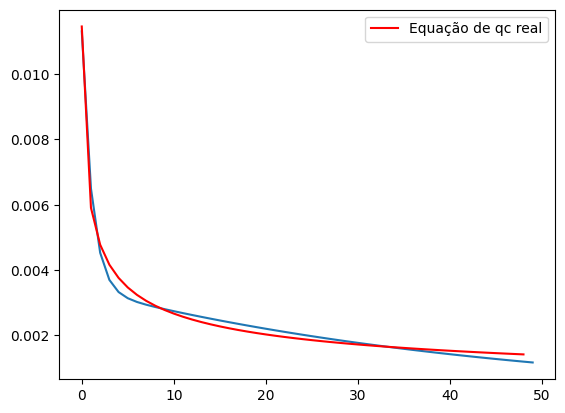

In [18]:
def func(x, a, b, c , d):
    return a/(np.e**(b*x)) + c/(np.e**(d*x))
popt, pcov = curve_fit(func, xdata[0:-1], qc_novo)
a=popt[0]
b=popt[1]
c=popt[2]
d=popt[3]
qcc=a/(np.e**(b*xdata))+c/(np.e**(d*xdata))
plt.plot(qcc)
plt.plot(qc_novo,color='red',lw=1.5,label='Equação de qc real')
#plt.plot(a*np.e**(b*xdata)+c*np.e**(xdata))
plt.legend()
plt.show()

In [11]:
a,b,c,d

(0.007898380128859926,
 0.5472732560623595,
 0.003408254150738857,
 0.013047853839254369)

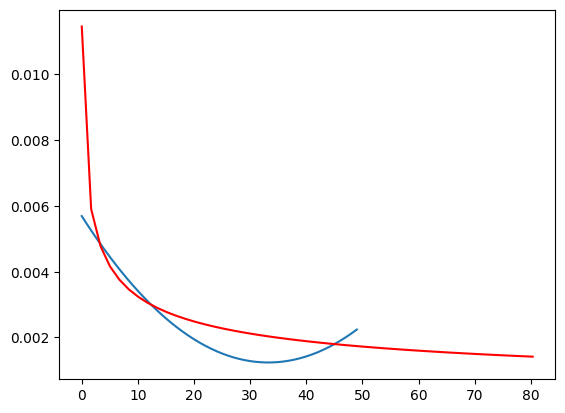

In [12]:
# polinomio quadratico
def func(x, b,c,d):
    return  b*x**2+c*x+d
popt, pcov = curve_fit(func, xdata[0:-1], qc_novo)
b=popt[0]
c=popt[1]
d=popt[2]
qcc=b*xdata**2+c*xdata+d
plt.plot(qcc)
plt.plot(xdata[0:-1],qc_novo,color='red',lw=1.5,label='Equação de qc real')
#plt.plot(a*np.e**(b*xdata)+c*np.e**(xdata))
plt.show()

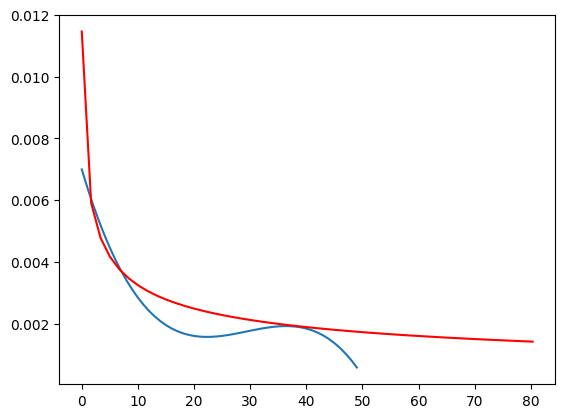

In [13]:
def func(x, a, b,c,d):
    return a*x**3 + b*x**2+c*x+d
popt, pcov = curve_fit(func, xdata[0:-1], qc_novo) # popt=parâmetros, pcov= covariância
a=popt[0]
b=popt[1]
c=popt[2]
d=popt[3]
qcc=a*xdata**3+b*xdata**2+c*xdata+d
plt.plot(qcc)
plt.plot(xdata[0:-1],qc_novo,color='red',lw=1.5,label='Equação de qc real')
#plt.plot(a*np.e**(b*xdata)+c*np.e**(xdata))
plt.show()

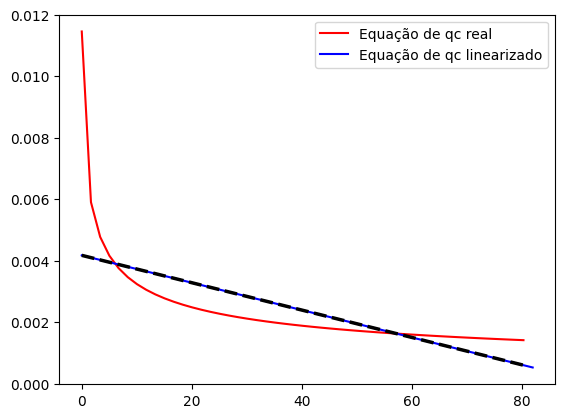

In [14]:
def func(x, a, b):
    return a*x + b

a=popt[0]
b=popt[1]
qcc=a*xdata+b
popt, pcov = curve_fit(func, xdata[0:-1], qc_novo) # popt=parâmetros, pcov= covariância
plt.plot(xdata[0:-1],qc_novo,color='red',lw=1.5,label='Equação de qc real')
plt.plot(xdata, func(xdata, *popt),color='blue',lw=1.5,label='Equação de qc linearizado')
plt.plot(xdata[0:-1],popt[0]*xdata[0:-1]+popt[1],"--",color='black',lw=2.5,)
plt.legend()
plt.show()

In [15]:
popt[0],popt[1]

(-4.448323983109312e-05, 0.004175912860745508)

### Referências:

[[1]](https://www.skf.com/binaries/pub45/Images/0901d196809bc23a-17-0707-PT---17000-w-Apendix-1---SKF-friction-model_tcm_45-299767.pdf) O modelo SKF para cálculo do momento de atrito<br>
[[2]](https://www.skfbearingselect.com/)Ferramenta online SKF de seleção e calculo de rolamento<br>
[[3]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) scipy.optimize.curve_fit